# Big Mart Sales Prediction

## Introduction of problem

BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

## Attributes Variables
### Input variables :

Item Identifier           ----> Unique product ID

Item Weight               ----> Weight of product

Item Fat Content          ----> Whether the product is low fat or not

Item Visibility           ----> The % of the total display area of all products in a store allocated to the particular product

Item Type                 ----> The category to which the product belongs

Item MRP                  ----> Maximum Retail Price (list price) of the product

Outlet Identifier         ----> Unique store ID

Outlet Establishment Year ----> The year in which the store was established

Outlet Size               ----> The size of the store in terms of ground area covered

Outlet Location Type      ----> The type of city in which the store is located

Outlet Type               ----> Whether the outlet is just a grocery store or some sort of supermarket

### Output variables :

Item Outlet Sales         ----> sales of the product in t particular store. This is the outcome variable to be predicted.


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

## Data Collection

In [2]:
# Load data from CSV file to Pandas Dataframe

bm = pd.read_csv(r"C:\Users\user\Downloads\Big_Mart_Sales\Train.csv")

In [3]:
# First Five Rows of Dataframe

bm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# No. of Features in Dataframe

bm.shape

(8523, 12)

In [5]:
# Some information about Dataframe

bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Checking for missing values

bm.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight and Outlet_Size column having missing values

### Handling Missing values

In [7]:
# Describe "Item_Weight" Column

bm["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [8]:
# Filling the missing values in "Item_weight" with Mean value

bm["Item_Weight"].fillna(bm["Item_Weight"].mean(), inplace = True)

 "Item_Weight" is Numerical column so we fill it with the Mean Imputation

In [9]:
# Mode of "Outlet_Size" Column

bm["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [10]:
# Filling the missing values in "Outlet_Size" with Mode value

bm["Outlet_Size"].fillna(bm["Outlet_Size"].mode()[0], inplace = True)

"Outlet_Size" is the Categorical Column so we fil with it with the mode value

In [11]:
# Again Checking the Missing the Value

bm.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

We fill all the missing value So, there are no missing value.

In [12]:
bm.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
# See the different values in "Item_Fat_Content"

bm["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

We need to replace some values 

We will replace:

1) LF to Low Fat

2) low fat to Low Fat

3) reg to Regular

In [14]:
bm["Item_Fat_Content"] = bm["Item_Fat_Content"].str.replace("LF","Low Fat")

bm["Item_Fat_Content"] = bm["Item_Fat_Content"].str.replace("low fat","Low Fat")

bm["Item_Fat_Content"] = bm["Item_Fat_Content"].str.replace("reg","Regular")

In [15]:
bm["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

Low fat based item had more sales than regular

## Selecting Features based on General requirement

In [16]:
bm.drop(["Item_Identifier","Outlet_Identifier"], axis=1, inplace = True)

There are no requirement of "Item_Identifier" and "Outlet_Identifier" in dataframe so we drop it these coumns

In [17]:
# First five rows after drop "Item_Identifier" and "Outlet_Identifier" columns

bm.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
# No. of Features in Dataframe after drop "Item_Identifier" and "Outlet_Identifier" columns

bm.shape

(8523, 10)

# Data Analysis and Visualization

In [19]:
# Statistical measures of the Dataset

bm.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Univariate Analysis

In [20]:
sns.set()

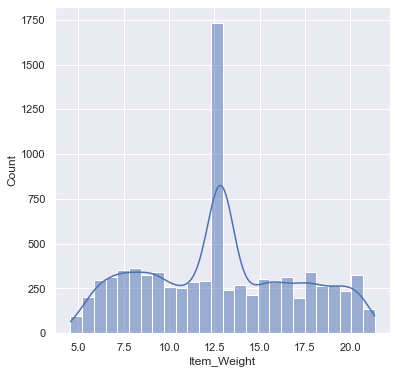

In [21]:
# Item_Weight Distribution

plt.figure(figsize=(6,6))
sns.histplot(bm["Item_Weight"],kde = True)
plt.show()

We had Items of weights 5 to 20 kg and we had more items of average weight i.e around 12.5 kg

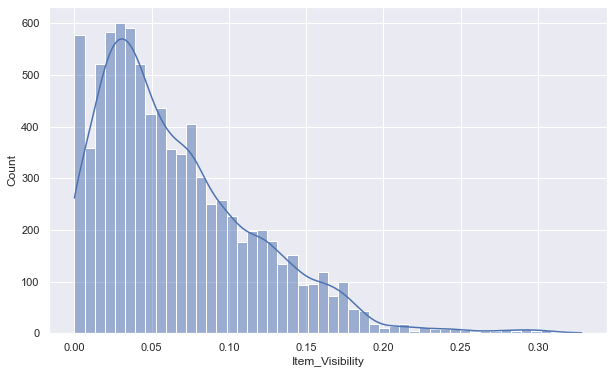

In [22]:
# Item_Visibility Distribution

plt.figure(figsize=(10,6))
sns.histplot(bm["Item_Visibility"],kde = True)
plt.show()

Most of the items had item visibility not more than 0.20

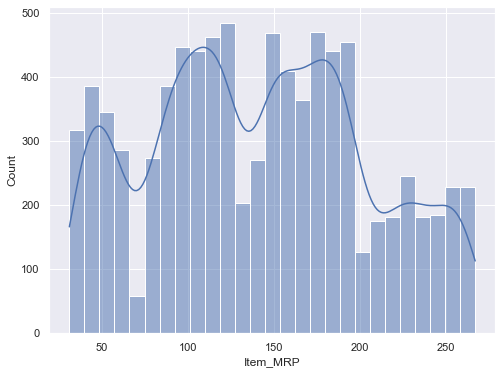

In [23]:
# Item_MRP Distribution

plt.figure(figsize=(8,6))
sns.histplot(bm["Item_MRP"], kde=True)
plt.show()

Items of MRP Rs 50, 100 and 150 were found more

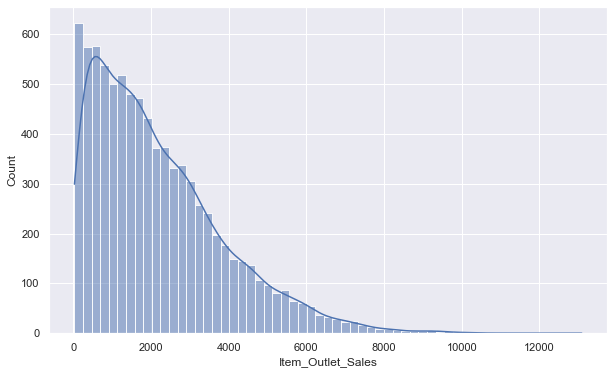

In [24]:
# Item_Outlet_Sales Distribution

plt.figure(figsize=(10,6))
sns.histplot(bm["Item_Outlet_Sales"], kde=True)
plt.show()

Mostly item sale was around Rs 2500

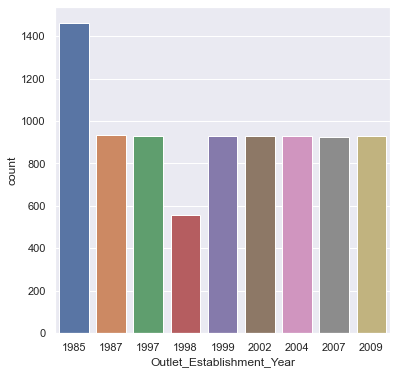

In [25]:
# Outlet_Establishment_Year

plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year", data=bm)
plt.show()

Most of the Outlets established in 1985 and less number of outlet have been established in 1998

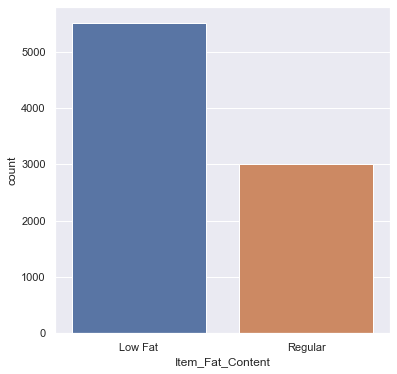

In [26]:
# Item_Fat_Content 

plt.figure(figsize=(6,6))
sns.countplot(x = "Item_Fat_Content", data=bm)
plt.show()

low fat based item had more sales than regular

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


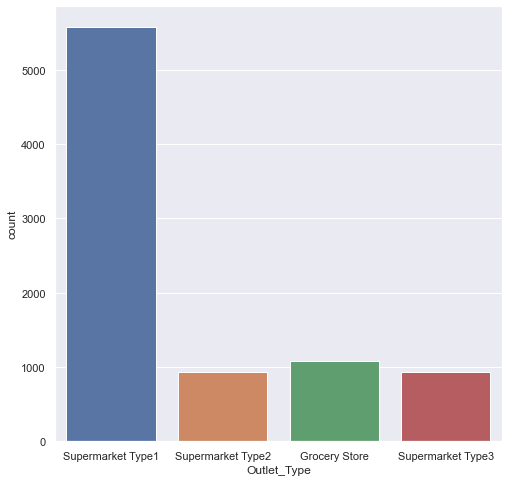

In [27]:
# Outlet_Type

plt.figure(figsize=(8,8))
sns.countplot("Outlet_Type", data= bm)
plt.show()

There are more number of Supermarket Type 1 than any other Outlet_Type

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


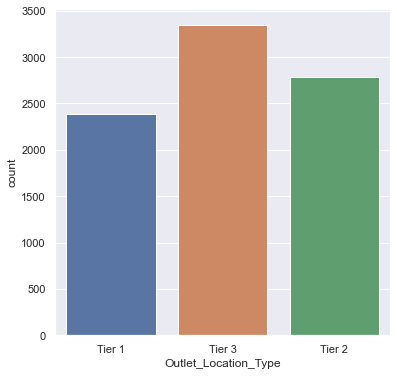

In [28]:
# Outlet_Location_Type

plt.figure(figsize=(6,6))
sns.countplot("Outlet_Location_Type", data= bm)
plt.show()

There are more stores at tier 3 cities

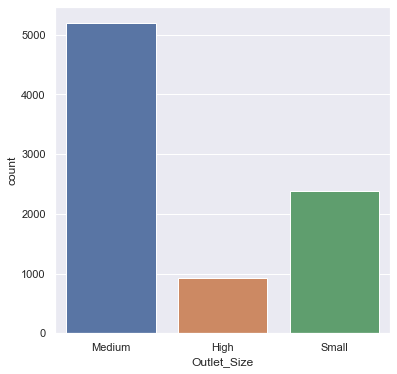

In [29]:
# Outlet_Size

plt.figure(figsize=(6,6))
sns.countplot(x = "Outlet_Size", data=bm)
plt.show()

Medium has more Outlet size and High has low Outlet size

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


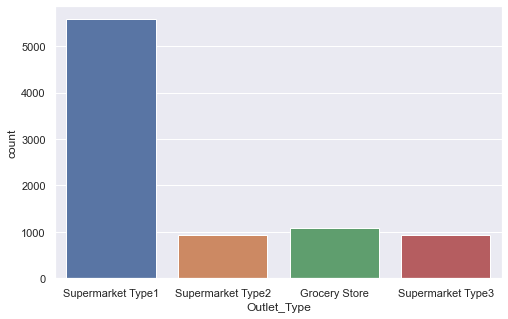

In [30]:
# Outlet_Type

plt.figure(figsize=(8,5))
sns.countplot("Outlet_Type", data= bm)
plt.show()

The Outlets are more of Supermarket Type1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


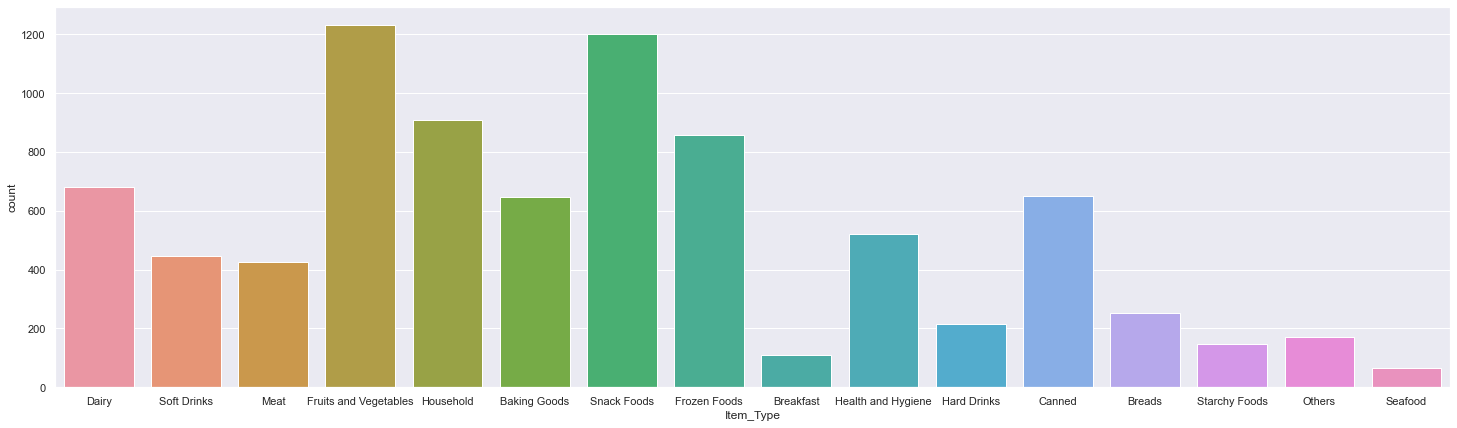

In [31]:
# Item_Type

plt.figure(figsize=(25,7))
sns.countplot("Item_Type", data= bm)
plt.show()

Fruits and Vegetables are largely sold as people tend to use them on daily purpose.

Snack Foods too have good sales

## Bivariate Analysis

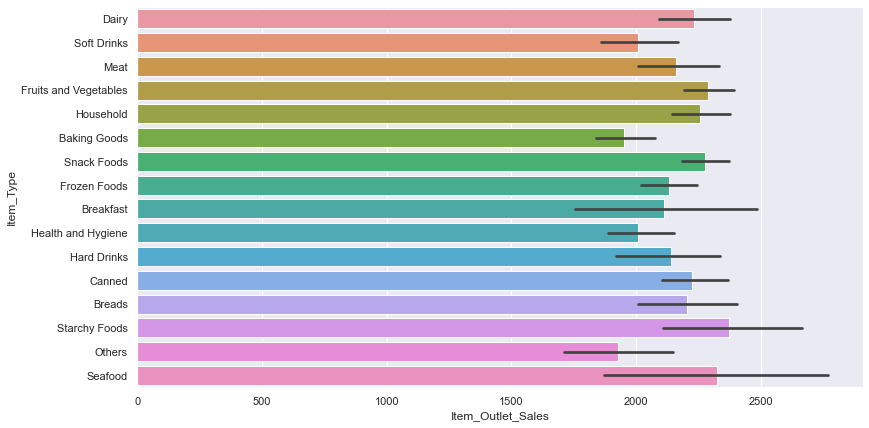

In [32]:
# Item_Type

plt.figure(figsize=(13,7))
sns.barplot( x = "Item_Outlet_Sales",y="Item_Type" ,data=bm)
plt.show()

The products available were fruits & vegetables and Snack foods but the sales of seafood and Starchy food seems higher and hence the sales can be improved with having stock of products that are most brought by customers.

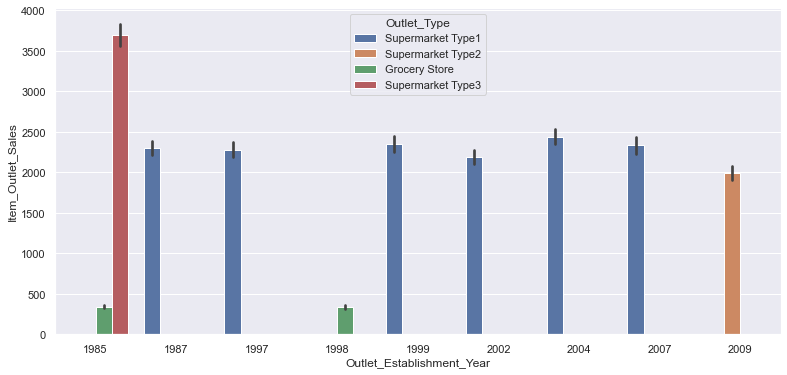

In [33]:
plt.figure(figsize=(13,6))
sns.barplot(x= "Outlet_Establishment_Year", y= "Item_Outlet_Sales", data=bm, hue= "Outlet_Type")
plt.show()

The one which was oldest outlet of supermarket type hsd more sale

The grocery store Outlet which was established in 1998 and in 1985 has less sales

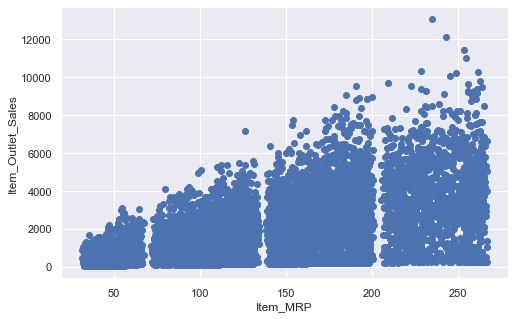

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(y= "Item_Outlet_Sales", x= "Item_MRP", data= bm)
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.show()

Items MRP ranging from 200-250 is having high sales

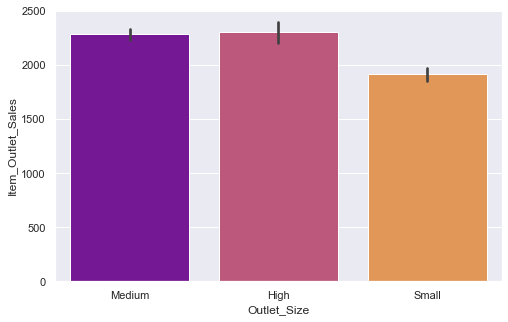

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x= "Outlet_Size", y= "Item_Outlet_Sales", data= bm, palette= "plasma")
plt.show()

The Outlet Sales is maximum for Medium and High sized Outlets

The Outlets we have is Medium and may be with High Size Outlets can improve the Outlet Sales

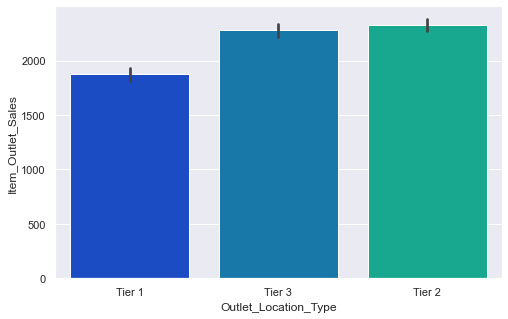

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x= "Outlet_Location_Type", y= "Item_Outlet_Sales", data= bm, palette= "winter")
plt.show()

The Outlet Sales tend to be high for Tier3 and Tier2 Locations maximum Outlets

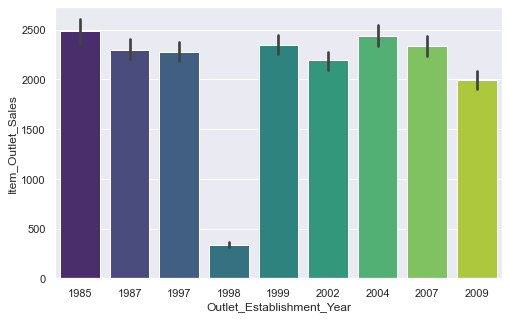

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x= "Outlet_Establishment_Year", y= "Item_Outlet_Sales", data= bm, palette= "viridis")
plt.show()

Outlet Established 1985 having good sales

we also have a outlet which was established 1998 has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

## Multivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


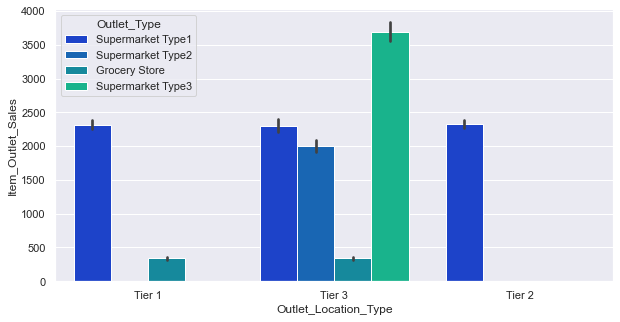

In [38]:
plt.figure(figsize=(10,5))
sns.barplot("Outlet_Location_Type", "Item_Outlet_Sales", hue= "Outlet_Type", data= bm, palette= "winter")
plt.show()

The Tier-3 location type has all types of Outlet type and has High Sales margin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


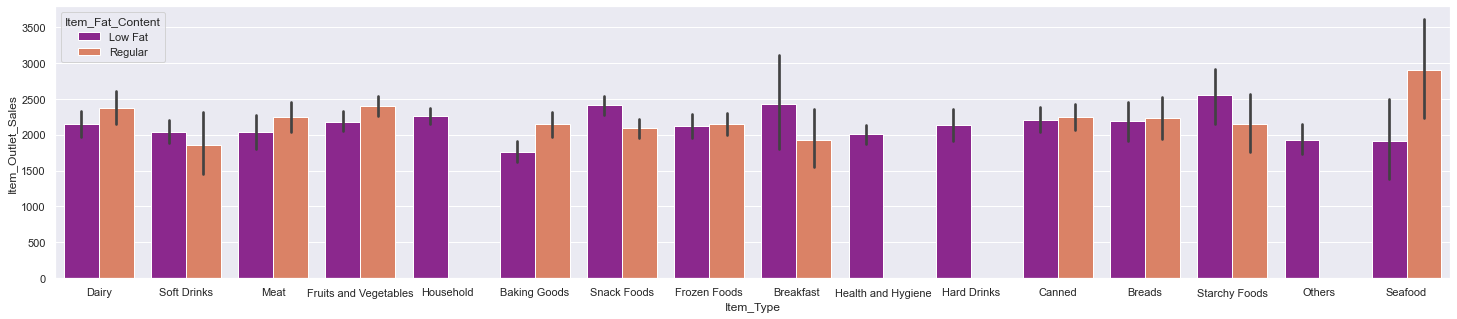

In [39]:
plt.figure(figsize=(25,5))
sns.barplot("Item_Type", "Item_Outlet_Sales", hue= "Item_Fat_Content", data= bm, palette= "plasma")
plt.show()

## Check for Outliers

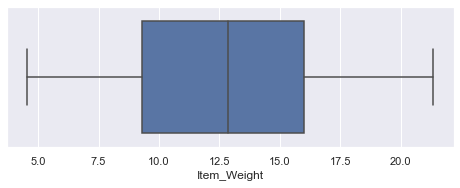

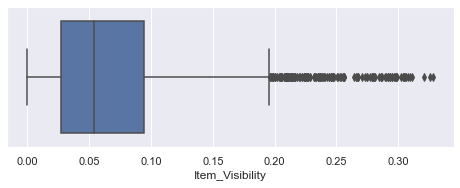

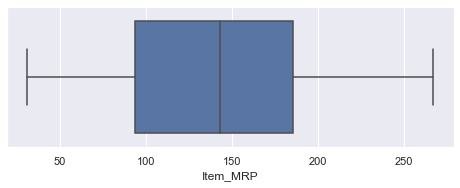

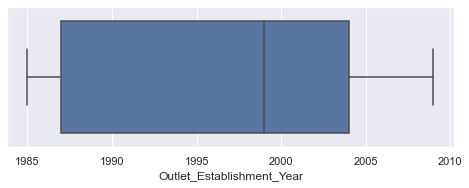

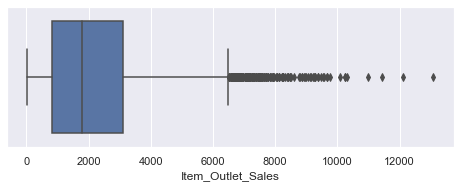

In [40]:
plt.figure(figsize=(8,15))
plt.subplot(5,1,1)
sns.boxplot(x='Item_Weight',data=bm)

plt.figure(figsize=(8,15))
plt.subplot(5,1,2)
sns.boxplot(x='Item_Visibility',data=bm)

plt.figure(figsize=(8,15))
plt.subplot(5,1,3)
sns.boxplot(x='Item_MRP',data=bm)

plt.figure(figsize=(8,15))
plt.subplot(5,1,4)
sns.boxplot(x='Outlet_Establishment_Year',data=bm)

plt.figure(figsize=(8,15))
plt.subplot(5,1,5)
sns.boxplot(x='Item_Outlet_Sales',data=bm)

plt.show()

In these barplots we can see the "Item_Visibility" and "Item_Outlet_Sales" having outliers

## Treating Outliers

As seen earlier "Item_Visibility" and "Item_Outlet_Sales" were having outliers. We will remove the outliers using inter quartile range.

### Defining functions

In [41]:
def treat_outlier(x):
    # Taking 25 and 75 percentile of column
    percentile25 = np.percentile(x,25)
    percentile75 = np.percentile(x,75)
    
    # Calculating IQR range
    IQR = percentile75 - percentile25
    
    # Calculating Minimum Threshold
    lower_fence = percentile25-1.5*IQR
    
    # Calculating maximum Threshold
    higher_fence = percentile75+1.5*IQR
    
    # Capping Outliers
    return x.apply(lambda y: higher_fence if y > higher_fence else y).apply(lambda y: lower_fence if y < lower_fence else y)

In [42]:
bm_cleaned = bm
req_col = ["Item_Visibility", "Item_Outlet_Sales"]
for i in req_col:
    bm_cleaned[i]=treat_outlier(bm_cleaned[i])

## Check for Outliers after Cleaning

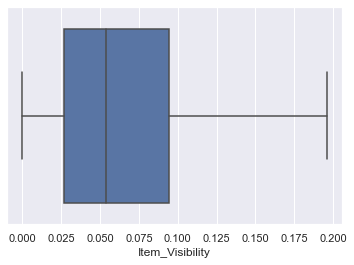

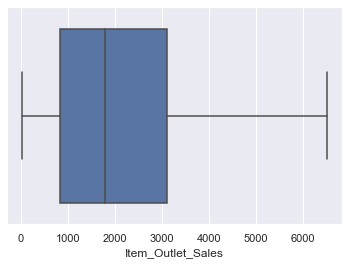

In [43]:
plt.figure(figsize=(6,4))
plt.subplot(1,1,1)
sns.boxplot(x='Item_Visibility',data=bm)

plt.figure(figsize=(6,4))
plt.subplot(1,1,1)
sns.boxplot(x='Item_Outlet_Sales',data=bm)
plt.show()

All Outlier are fixed, there are no any outliers

## Correlation

In [44]:
correlation=bm.corr()

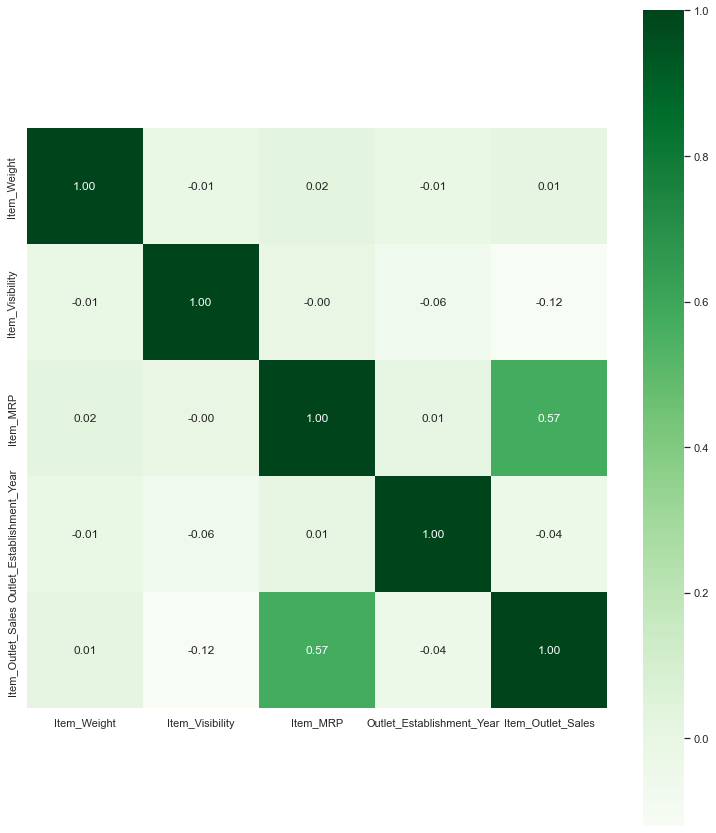

In [45]:
plt.figure(figsize=(13,15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':12}, cmap="Greens")
plt.show()

None of the columns is found to have strongly correlated but still Item_MRP column is still positively correlated with Item_Outlet_Sales with value 0.57

In [46]:
bm.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


# Feature Engineering

## Label Encoding

To transform Categorical values into numerical values we use Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
encoder = LabelEncoder()

In [49]:
bm["Item_Fat_Content"] = encoder.fit_transform(bm["Item_Fat_Content"])

bm["Item_Type"] = encoder.fit_transform(bm["Item_Type"])

bm["Outlet_Size"] = encoder.fit_transform(bm["Outlet_Size"])

bm["Outlet_Location_Type"] = encoder.fit_transform(bm["Outlet_Location_Type"])

bm["Outlet_Type"] = encoder.fit_transform(bm["Outlet_Type"])

In [50]:
bm.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


### Splitting Features and Target

In [51]:
X = bm.drop(columns="Item_Outlet_Sales", axis=1)
Y = bm["Item_Outlet_Sales"]

In [52]:
print(X)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          4  249.8092   
1           5.920                 1         0.019278         14   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 1         0.000000          6  182.0950   
4           8.930                 0         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783         13  214.5218   
8519        8.380                 1         0.046982          0  108.1570   
8520       10.600                 0         0.035186          8   85.1224   
8521        7.210                 1         0.145221         13  103.1332   
8522       14.800                 0         0.044878         14   75.4670   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0    

In [53]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


## Train & Test Split

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [55]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 9) (6818, 9) (1705, 9)


In [56]:
print(Y.shape, Y_train.shape, Y_test.shape)

(8523,) (6818,) (1705,)


## Standardization

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc= StandardScaler()

In [59]:
X_train_std= sc.fit_transform(X_train)

In [60]:
X_train_std

array([[-0.66949237, -0.73893961,  0.48204067, ...,  1.38454768,
        -1.36837303, -0.25633269],
       [ 1.841261  , -0.73893961, -0.85881095, ...,  1.38454768,
        -0.13999024, -0.25633269],
       [ 0.79906149,  1.35329056,  1.28751076, ..., -0.28091564,
        -1.36837303, -0.25633269],
       ...,
       [-0.52737425, -0.73893961, -0.17923968, ..., -1.94637895,
         1.08839255, -0.25633269],
       [-1.94618677, -0.73893961,  1.16957741, ..., -0.28091564,
        -1.36837303, -0.25633269],
       [ 1.42674983, -0.73893961, -0.46203717, ..., -0.28091564,
        -0.13999024, -0.25633269]])

In [61]:
X_test_std= sc.transform(X_test)

In [62]:
X_test_std

array([[-0.45749951,  1.35329056, -1.14114088, ..., -1.94637895,
         1.08839255, -0.25633269],
       [ 0.91749325,  1.35329056,  0.11843841, ..., -0.28091564,
         1.08839255, -1.50824983],
       [ 1.36753395, -0.73893961,  1.07441759, ...,  1.38454768,
        -1.36837303, -0.25633269],
       ...,
       [ 0.83459101, -0.73893961, -0.22587514, ..., -0.28091564,
         1.08839255, -1.50824983],
       [-0.33906775, -0.73893961, -1.13542755, ..., -0.28091564,
        -1.36837303, -0.25633269],
       [ 0.68062972,  1.35329056,  1.17603945, ..., -0.28091564,
        -0.13999024, -0.25633269]])

# Model Training

## 1) Linear Regression Model

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr= LinearRegression()

In [65]:
lr.fit(X_train_std, Y_train)

LinearRegression()

In [66]:
# Prediction on training data

y_train_pred1 = lr.predict(X_train_std)

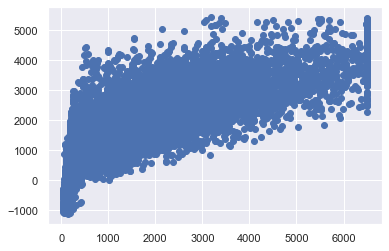

In [67]:
# compare the values of the predictions array with the values of y_train

plt.scatter(Y_train, y_train_pred1)
plt.show()

We can see our predicted values are very close to the actual values

In [68]:
# r2 score of training data
r2_train1 = metrics.r2_score(Y_train, y_train_pred1)

# mean absolute error
mae_train1 = metrics.mean_absolute_error(Y_train, y_train_pred1)

# Mean Squared error
mse_train1 = metrics.mean_squared_error(Y_train, y_train_pred1)

# Root mean squared error
rmse_train1 = np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred1))

# Mean Absolute percentage error
mape_train1 = metrics.mean_absolute_percentage_error(Y_train, y_train_pred1)

In [69]:
print('R Squared value = ', r2_train1)
print('Mean Absolute Error = ', mae_train1)
print('Mean Squared Error = ', mse_train1)
print('Root Mean Squared Error = ', rmse_train1)
print('Mean Absolute Percentage Error = ', mape_train1)

R Squared value =  0.5199582875018587
Mean Absolute Error =  867.8863756671872
Mean Squared Error =  1268975.795865225
Root Mean Squared Error =  1126.4882582012228
Mean Absolute Percentage Error =  0.9636122006503697


In [70]:
# Prediction on test data

y_test_pred1= lr.predict(X_test_std)

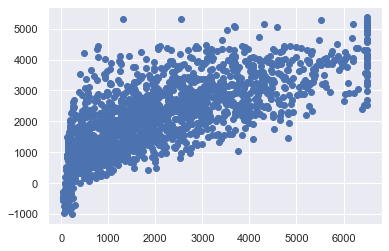

In [71]:
# compare the values of the predictions array with the values of y_test

plt.scatter(Y_test, y_test_pred1)
plt.show()

We can see our predicted values are close to the actual values

In [72]:
# r2 score of test data
r2_test1 = metrics.r2_score(Y_test, y_test_pred1)

# mean absolute error
mae_test1 = metrics.mean_absolute_error(Y_test, y_test_pred1)

# mean squared error
mse_test1 = metrics.mean_squared_error(Y_test, y_test_pred1)

# Root mean squared error
rmse_test1 = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred1))

# Mean absolute percentage error
mape_test1 = metrics.mean_absolute_percentage_error(Y_test, y_test_pred1)

In [73]:
print('R Squared value = ', r2_test1)
print('Mean Absolute Error = ', mae_test1)
print('Mean Squared Error = ', mse_test1)
print('Root Mean Squared Error = ', rmse_test1)
print('Mean Absolute Percentage Error = ', mape_test1)

R Squared value =  0.5051749702408289
Mean Absolute Error =  884.7605809463363
Mean Squared Error =  1298780.4425299596
Root Mean Squared Error =  1139.6404882812649
Mean Absolute Percentage Error =  1.0162630013809064


## 2) K-Nearest Neighbor

In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
knn=KNeighborsRegressor()

In [76]:
knn.fit(X_train_std,Y_train)

KNeighborsRegressor()

In [77]:
# Prediction on training data

y_train_pred3 = knn.predict(X_train_std)

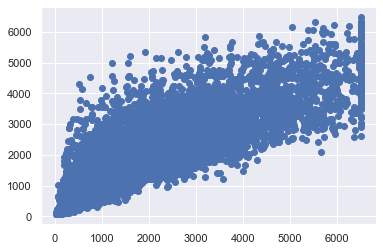

In [78]:
# compare the values of the predictions array with the values of y_train

plt.scatter(Y_train, y_train_pred3)
plt.show()

In [79]:
# r2 score of training data
r2_train3 = metrics.r2_score(Y_train, y_train_pred3)

# mean absolute error
mae_train3 = metrics.mean_absolute_error(Y_train, y_train_pred3)

# mean squared error
mse_train3 = metrics.mean_squared_error(Y_train, y_train_pred3)

# Root mean squared error
rmse_train3 = np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred3))

# Mean absolute percentage error
mape_train3 = metrics.mean_absolute_percentage_error(Y_train, y_train_pred3)

In [80]:
print('R Squared value = ', r2_train3)
print('Mean Absolute Error = ', mae_train3)
print('Mean Squared Error = ', mse_train3)
print('Root Mean Squared Error = ', rmse_train3)
print('Mean Absolute Percentage Error = ', mape_train3)

R Squared value =  0.6882998230386541
Mean Absolute Error =  653.4715675271341
Mean Squared Error =  823970.0214226422
Root Mean Squared Error =  907.7279446082081
Mean Absolute Percentage Error =  0.490147999299696


In [81]:
# Prediction on test data

y_test_pred3= knn.predict(X_test_std)

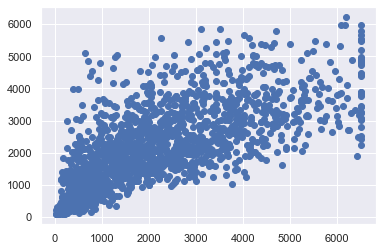

In [82]:
# compare the values of the predictions array with the values of y_test

plt.scatter(Y_test, y_test_pred3)
plt.show()

In [83]:
# r2 score of test data
r2_test3 = metrics.r2_score(Y_test, y_test_pred3)

# mean absolute error
mae_test3 = metrics.mean_absolute_error(Y_test, y_test_pred3)

# mean squared error
mse_test3 = metrics.mean_squared_error(Y_test, y_test_pred3)

# Root mean squared error
rmse_test3 = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred3))

# Mean absolute percentage error
mape_test3 = metrics.mean_absolute_percentage_error(Y_test, y_test_pred3)

In [84]:
print('R Squared value = ', r2_test3)
print('Mean Absolute Error = ', mae_test3)
print('Mean Squared Error = ', mse_test3)
print('Root Mean Squared Error = ', rmse_test3)
print('Mean Absolute Percentage Error = ', mape_test3)

R Squared value =  0.5114939090051365
Mean Absolute Error =  827.5191493137829
Mean Squared Error =  1282194.9555576832
Root Mean Squared Error =  1132.340476869781
Mean Absolute Percentage Error =  0.6375312915864171


## 3) Decision Tree

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
dt= DecisionTreeRegressor()

In [87]:
dt.fit(X_train_std,Y_train)

DecisionTreeRegressor()

In [88]:
# Prediction on training data

y_train_pred4 = dt.predict(X_train_std)

In [89]:
# r2 score of training data
r2_train4 = metrics.r2_score(Y_train, y_train_pred4)

# mean absolute error
mae_train4 = metrics.mean_absolute_error(Y_train, y_train_pred4)

# mean squared error
mse_train4 = metrics.mean_squared_error(Y_train, y_train_pred4)

# Root mean squared error
rmse_train4 = np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred4))

# Mean absolute percentage error
mape_train4 = metrics.mean_absolute_percentage_error(Y_train, y_train_pred4)

In [90]:
print('R Squared value = ', r2_train4)
print('Mean Absolute Error = ', mae_train4)
print('Mean Squared Error = ', mse_train4)
print('Root Mean Squared Error = ', rmse_train4)
print('Mean Absolute Percentage Error = ', mape_train4)

R Squared value =  1.0
Mean Absolute Error =  3.2265184950326637e-15
Mean Squared Error =  2.9131751575353505e-27
Root Mean Squared Error =  5.397383771361223e-14
Mean Absolute Percentage Error =  5.5165098856673e-19


In [91]:
# Prediction on test data

y_test_pred4= dt.predict(X_test_std)

In [92]:
# r2 score of test data
r2_test4 = metrics.r2_score(Y_test, y_test_pred4)

# mean absolute error
mae_test4 = metrics.mean_absolute_error(Y_test, y_test_pred4)

# mean squared error
mse_test4 = metrics.mean_squared_error(Y_test, y_test_pred4)

# Root mean squared error
rmse_test4 = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred4))

# Mean absolute percentage error
mape_test4 = metrics.mean_absolute_percentage_error(Y_test, y_test_pred4)

In [93]:
print('R Squared value = ', r2_test4)
print('Mean Absolute Error = ', mae_test4)
print('Mean Squared Error = ', mse_test4)
print('Root Mean Squared Error = ', rmse_test4)
print('Mean Absolute Percentage Error = ', mape_test4)

R Squared value =  0.22570437275981792
Mean Absolute Error =  1016.3292515542522
Mean Squared Error =  2032314.3675360489
Root Mean Squared Error =  1425.5926373042366
Mean Absolute Percentage Error =  0.7125789869785416


# Hyperparameter Tuning using GridSearchCV

In [94]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [2, 4, 6, 8, 10],
            "min_samples_leaf":[2,4,6,8,10],
            "max_features":["auto","log2","sqrt"],
            "max_leaf_nodes":[5,10,20] }

In [95]:
dt_grid_search = GridSearchCV(estimator=dt, 
                           param_grid=parameters, 
                           cv=5, n_jobs=-1, verbose=1)

In [96]:
# fitting the model for grid search
dt_grid_search.fit(X_train_std, Y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [5, 10, 20],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']},
             verbose=1)

In [97]:
dt_grid_search.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 6,
 'splitter': 'best'}

### Training Decision tree with best parameters

In [98]:
dt_tuned_grid_search = DecisionTreeRegressor(max_depth=6, max_features= 'auto', max_leaf_nodes=30, min_samples_leaf=50, splitter='best')

In [99]:
# fitting model

dt_tuned_grid_search.fit(X_test_std, Y_test )

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=6, max_features='auto', max_leaf_nodes=30,
                      min_samples_leaf=50)

In [100]:
# Prediction 

tuned_pred4= dt_tuned_grid_search.predict(X_test_std)

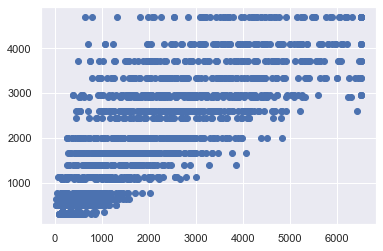

In [101]:
plt.scatter(Y_test,tuned_pred4)
plt.show()

In [102]:
# r2 score after tuning
tuned_r2_test4 = metrics.r2_score(Y_test, tuned_pred4)

# mean absolute error after tuning
tuned_mae_test4 = metrics.mean_absolute_error(Y_test, tuned_pred4)

# mean squared error after tuning
tuned_mse_test4 = metrics.mean_squared_error(Y_test, tuned_pred4)

# Root mean squared error after tuning
tuned_rmse_test4 = np.sqrt(metrics.mean_squared_error(Y_test, tuned_pred4))

# Mean absolute percentage error after tuning
tuned_mape_test4 = metrics.mean_absolute_percentage_error(Y_test, tuned_pred4)

In [103]:
print('R Squared value = ', tuned_r2_test4)
print('Mean Absolute Error = ', tuned_mae_test4)
print('Mean Squared Error = ', tuned_mse_test4)
print('Root Mean Squared Error', tuned_rmse_test4)
print('Mean Absolute Percentage Error', tuned_mape_test4)

R Squared value =  0.5987834330098821
Mean Absolute Error =  753.0417410308982
Mean Squared Error =  1053083.8156658923
Root Mean Squared Error 1026.1987213331988
Mean Absolute Percentage Error 0.6939614721570654


In [104]:
# Adjusted R2 Score

X_test_std.shape

(1705, 9)

In [105]:
1 - ((1-tuned_r2_test4)*(1705-1)/(1705-1-9))

0.5966530795568372

## 4) Random Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
rf= RandomForestRegressor(max_samples=0.75, random_state=42)

In [108]:
rf.fit(X_train_std, Y_train)

RandomForestRegressor(max_samples=0.75, random_state=42)

In [109]:
# Prediction on training data

y_train_pred5 = rf.predict(X_train_std)

In [110]:
# r2 score of training data
r2_train5 = metrics.r2_score(Y_train, y_train_pred5)

# mean absolute error
mae_train5 = metrics.mean_absolute_error(Y_train, y_train_pred5)

# mean squared error
mse_train5 = metrics.mean_squared_error(Y_train, y_train_pred5)

# Root mean squared error
rmse_train5 = np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred5))

# Mean absolute percentage error
mape_train5 = metrics.mean_absolute_percentage_error(Y_train, y_train_pred5)

In [111]:
print('R Squared value = ', r2_train5)
print('Mean Absolute Error = ', mae_train5)
print('Mean Squared Error = ', mse_train5)
print('Root Mean Squared Error = ', rmse_train5)
print('Mean Absolute Percentage Error = ', mape_train5)

R Squared value =  0.9036940554489401
Mean Absolute Error =  361.0444074721326
Mean Squared Error =  254581.8612246258
Root Mean Squared Error =  504.56105797477653
Mean Absolute Percentage Error =  0.26552508386220647


In [112]:
# prediction on test data

y_test_pred5= rf.predict(X_test_std)

In [113]:
# r2 score of test data
r2_test5 = metrics.r2_score(Y_test, y_test_pred5)

# mean absolute error
mae_test5 = metrics.mean_absolute_error(Y_test, y_test_pred5)

# mean squared error
mse_test5 = metrics.mean_squared_error(Y_test, y_test_pred5)

# Root mean squared error
rmse_test5 = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred5))

# Mean absolute percentage error
mape_test5 = metrics.mean_absolute_percentage_error(Y_test, y_test_pred5)

In [114]:
print('R Squared value = ', r2_test5)
print('Mean Absolute Error = ', mae_test5)
print('Mean Squared Error = ', mse_test5)
print('Root Mean Squared Error = ', rmse_test5)
print('Mean Absolute Percentage Error = ', mape_test5)

R Squared value =  0.5606445087512295
Mean Absolute Error =  775.0547145865102
Mean Squared Error =  1153188.0665571163
Root Mean Squared Error =  1073.86594440699
Mean Absolute Percentage Error =  0.5864953605731663


# Hyperparameter Tuning using GridSearchCv

In [115]:
# Number of trees in random forest
n_estimators = [ 50, 100, 150, 200, 250]

# Number of features to consider every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [2, 6, 8, None]

# Minimum number of samples required at each leaf
min_samples_leaf = [1, 2, 4]

# Minimum number of samples required a split of node
min_samples_split = [2, 5, 10]

In [116]:
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_leaf' : min_samples_leaf,
              'min_samples_split' : min_samples_split
             }
print(param_grid)

{'n_estimators': [50, 100, 150, 200, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 6, 8, None], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}


In [117]:
rf_grid_search = GridSearchCV(estimator=rf,
                       param_grid = param_grid,
                       cv = 5,
                       verbose = 2,
                       n_jobs = -1)

In [118]:
# fitting the model for grid search
rf_grid_search.fit(X_train_std, Y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_samples=0.75, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 6, 8, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=2)

In [119]:
rf_grid_search.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [120]:
rf_grid_search.best_estimator_

RandomForestRegressor(max_depth=6, max_features='auto', max_samples=0.75,
                      min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=42)

### Training Random Forest with best parameters

In [121]:
rf_tuned_grid_search = RandomForestRegressor(bootstrap=True, max_depth=6, max_features= 'auto',  min_samples_leaf=4, min_samples_split=10, n_estimators=200)

In [122]:
# fitting model

rf_tuned_grid_search.fit(X_test_std, Y_test )

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=6, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=200)

In [123]:
# Prediction

tuned_pred5= rf_tuned_grid_search.predict(X_test_std)

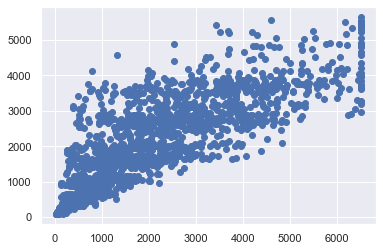

In [124]:
plt.scatter(Y_test,tuned_pred5)
plt.show()

In [125]:
# r2 score after tuning
tuned_r2_test5 = metrics.r2_score(Y_test, tuned_pred5)

# mean absolute error after tuning
tuned_mae_test5 = metrics.mean_absolute_error(Y_test, tuned_pred5)

# mean squared error after tuning
tuned_mse_test5 = metrics.mean_squared_error(Y_test, tuned_pred5)

# Root mean squared error after tuning
tuned_rmse_test5 = np.sqrt(metrics.mean_squared_error(Y_test, tuned_pred5))

# Mean absolute percentage error after tuning
tuned_mape_test5 = metrics.mean_absolute_percentage_error(Y_test, tuned_pred5)

In [126]:
print('R Squared value = ', tuned_r2_test5)
print('Mean Absolute Error = ', tuned_mae_test5)
print('Mean Squared Error = ', tuned_mse_test5)
print('Root Mean Squared Error = ', tuned_rmse_test5)
print('Mean Absolute Percentage Error = ',tuned_mape_test5)

R Squared value =  0.65443321896656
Mean Absolute Error =  682.019078698686
Mean Squared Error =  907018.3394172707
Root Mean Squared Error =  952.3751043665887
Mean Absolute Percentage Error =  0.5101144679198569


In [127]:
# Adjusted R2 score 
X_test_std.shape

(1705, 9)

In [128]:
1 - ((1-tuned_r2_test5)*(1705-1)/(1705-1-9))

0.6525983511026656

## 5) XGBoost

In [129]:
from xgboost import XGBRegressor

In [130]:
xgb= XGBRegressor()

In [131]:
xgb.fit(X_train_std,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [132]:
# Prediction on training data

y_train_pred6= xgb.predict(X_train_std)

In [133]:
# r2 score of training data
r2_train6 = metrics.r2_score(Y_train, y_train_pred6)

# mean absolute error
mae_train6 = metrics.mean_absolute_error(Y_train, y_train_pred6)

# mean squared error
mse_train6 = metrics.mean_squared_error(Y_train, y_train_pred6)

# Root mean squared error
rmse_train6 = np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred6))

# Mean absolute percentage error
mape_train6 = metrics.mean_absolute_percentage_error(Y_train, y_train_pred6)

In [134]:
print('R Squared value = ', r2_train6)
print('Mean Absolute Error = ', mae_train6)
print('Mean Squared Error = ', mse_train6)
print('Root Mean Squared Error = ', rmse_train6)
print('Mean Absolute Percentage Error = ',mape_train6)

R Squared value =  0.8494692746242116
Mean Absolute Error =  458.65777501862175
Mean Squared Error =  397923.43469870905
Root Mean Squared Error =  630.8117268240255
Mean Absolute Percentage Error =  0.37410519528142316


In [135]:
# Prediction on test data
y_test_pred6= xgb.predict(X_test_std)

In [136]:
# r2 score of test data
r2_test6 = metrics.r2_score(Y_test, y_test_pred6)

# mean absolute error
mae_test6 = metrics.mean_absolute_error(Y_test, y_test_pred6)

# mean squared error
mse_test6 = metrics.mean_squared_error(Y_test, y_test_pred6)

# Root mean squared error
rmse_test6 = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred6))

# Mean absolute percentage error
mape_test6 = metrics.mean_absolute_percentage_error(Y_test, y_test_pred6)

In [137]:
print('r Sqared Value = ', r2_test6)
print('Mean Absolute Error = ', mae_test6)
print('Mean Squared Error = ', mse_test6)
print('Root Mean Squared Error = ', rmse_test6)
print('Mean Absolute Percentage Error = ',mape_test6)

r Sqared Value =  0.5184680827060345
Mean Absolute Error =  809.5642163957567
Mean Squared Error =  1263889.6559855463
Root Mean Squared Error =  1124.2284714352088
Mean Absolute Percentage Error =  0.6139786828421757


# Hyperparameter Tuning using GridSearchCV

In [138]:
xgb_parameters= {
    'n_estimators'     : [250, 500], 
    'nthread'          : [4, 5, 6], 
    'max_depth'        : [5, 6, 7],
    'learning_rate'    : [0.03, 0.05, 0.07],
    'min_child_weight' : [3, 4, 5],
    'subsample'        : [0.5, 0.7],
    'colsample_bytree' : [0.5, 0.7]
    }
print(xgb_parameters)

{'n_estimators': [250, 500], 'nthread': [4, 5, 6], 'max_depth': [5, 6, 7], 'learning_rate': [0.03, 0.05, 0.07], 'min_child_weight': [3, 4, 5], 'subsample': [0.5, 0.7], 'colsample_bytree': [0.5, 0.7]}


In [139]:
xgb_grid_search = GridSearchCV(estimator=xgb,
                       param_grid = xgb_parameters,
                       cv = 5,
                       verbose = 2,
                       n_jobs = -1)

In [140]:
xgb_grid_search.fit(X_train_std, Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [3, 4, 5],
                         'n_estimators': [250, 500], 'nthread': [4, 5, 6],
                         'subsample': [0.5, 0.7]},
             verbose=2)

In [141]:
xgb_grid_search.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 250,
 'nthread': 4,
 'subsample': 0.7}

### Training XGBoost with best parameters

In [150]:
xgb_tuned_grid_search = XGBRegressor(colsample_bytree= 0.7,learning_rate= 0.03,max_depth= 5, min_child_weight= 3, n_estimators= 250, nthread= 4,subsample= 0.7)

In [151]:
# fitting tuned model

xgb_tuned_grid_search.fit(X_test_std, Y_test)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=250, n_jobs=4,
             nthread=4, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [152]:
# Prediction 

tuned_pred6= xgb_tuned_grid_search.predict(X_test_std)

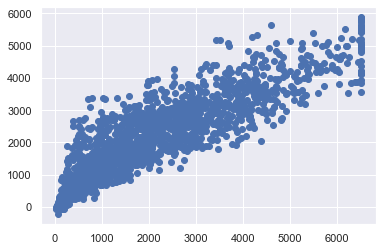

In [153]:
plt.scatter(Y_test,tuned_pred6)
plt.show()

In [154]:
# r2 score after tuning
tuned_r2_test6 = metrics.r2_score(Y_test, tuned_pred6)

# mean absolute error after tuning
tuned_mae_test6 = metrics.mean_absolute_error(Y_test, tuned_pred6)

# mean squared error fter tuning
tuned_mse_test6 = metrics.mean_squared_error(Y_test, tuned_pred6)

# Root mean squared error after tuning
tuned_rmse_test6 = np.sqrt(metrics.mean_squared_error(Y_test, tuned_pred6))

# Mean absolute percentage error after tuning
tuned_mape_test6 = metrics.mean_absolute_percentage_error(Y_test, tuned_pred6)

In [155]:
print('R Squared value = ', tuned_r2_test6)
print('Mean Absolute Error = ', tuned_mae_test6)
print('Mean Squared Error = ', tuned_mse_test6)
print('Root Mean Squared Error = ', tuned_rmse_test6)
print('Mean Absolute Percentage Error = ', tuned_mape_test6)

R Squared value =  0.7696505440244736
Mean Absolute Error =  567.8853513276082
Mean Squared Error =  604604.3558346994
Root Mean Squared Error =  777.5630880093906
Mean Absolute Percentage Error =  0.4517993857161497


In [156]:
# Adjusted R2 score 
X_test_std.shape

(1705, 9)

In [157]:
1 - ((1-tuned_r2_test6)*(1705-1)/(1705-1-9))

0.7684274495679664

## We found XGBoost is the best Model:

R Squared value                 =  0.7696505440244736

Adjusted R2 score               =  0.7684274495679664

Mean Absolute Error             =  567.8853513276082

Mean Squared Error              =  604604.3558346994

Root Mean Squared Error         =  777.5630880093906

Mean Absolute Percentage Error  =  0.4517993857161497

# Conclusions

Item_MRP clearly maximises the Outlet Sales.

Outlet Type being Supermarket or Grocery Store also depicts the Outlet Sales. 

Year Established will also tend to have loyal customers and that's how the sales margin can be achieved.